<a href="https://colab.research.google.com/github/jwphantom/tree-growth-simulator/blob/main/TP_OLONGO_ONDIGUI_JAMES_WILLIAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CONSIGNE** : 
Production des réalisations d'un modèle de croissance des arbres sur 50ans 

**1 a) Résolution par la méthode l'inverse la fonction de repartition **

*soit* 

$
f(x) = \left\{
    \begin{array}\\
         \theta\exp(-\theta x) & \mbox{if } \ x \geq 0 \\
        0 & \mbox{if } \ x < 0 \\   
    \end{array}
\right.
$


notre fonction de densité, la fonction de repartition associée est telle que 

$
 F(x) = \int_\infty^ \infty \theta\exp(-\theta x)\,dx
$

Ainsi on aura 


$
F(x) = \left\{
    \begin{array}\\
        1-\exp(-\theta x) & \mbox{if } \ x \geq 0 \\  
        0 & \mbox{if } \ x < 0 \\   
    \end{array}
\right.
$

Afin de trouver l'inverse de la fonction de repartition resolvons F(x) = Y


$F(x)^-1 $ est telle que :


$
 1-\exp(-\theta x) = Y
$


La resolution de cette équation nous amène à:

$ F(x)^-1 = \left\{
    \begin{array}\\
        \frac{-1}{\theta}\log(1-x) & \mbox{if } \ x \in [0,1] \\  
        0 & \mbox{if } \ x \in \mathbf{R}^*- \\   
    \end{array}
\right.
$ 

**b) Ecriture du code de cette fonction de repartition**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
import math

t = 1

In [2]:
# Inverse Simulateur de la loi du bruit
def inverseForest(x):
  if(x<0):
    return 0
  elif(x>0 and x<1):
    Result=(-1/t)*math.log(1-x)
    return 0 

**c) Ecriture du code de la fonction de densité**

In [3]:
# Fonction de densité
def densiteForest(x):
    p=t*x
    if(x<0):
        return 0
    return t*math.exp(-p)

**d) Ecriture du code la fonction du calcul des probalités**

In [4]:
# Fonction de probabilité
def probForest(q):
    return frForest(q)

**e) Ecriture de la fonction du calcul des quantilles**

In [5]:
# Fonction des quantiles
def quanForest(p):
    return(inverseForest(p))

**f) Ecriture de la fonction du calcul de la fonction de repartition**

In [6]:
# Fonction de répartition.
def frForest(x):
    p=x*t
    if(x<0):
        return 0
    result= 1-math.exp(-p)
    return result

In [7]:
#initialisation du seed à 13
seed = 13

# **2- Test des fonctions , répresenation des histogrammes d'un jeu tiré de vos simulations**


**a) Test des fonctions**



> Fonction Probabilité



In [8]:
print("P(-1)= " + str(probForest(-1)))
print("P(0.2)= " + str(probForest(0.2)))
print("P(2)= " + str(probForest(2)))

P(-1)= 0
P(0.2)= 0.18126924692201818
P(2)= 0.8646647167633873


> Fonction Quantille

In [9]:
print("Q(-2)= " + str(quanForest(-2)))
print("Q(0.04)= " + str(quanForest(0.04)))
print("Q(24)= " + str(quanForest(24)))

Q(-2)= 0
Q(0.04)= 0
Q(24)= None


**b) Tracons l'histogramme d'un jeu tiré de nos simulations**

In [10]:
#déclatation d'une fonction inverdse Forest Push pour pouvoir stocker les variables de chaque année sur 50 années dans un tableau
def inverseForestPush(x):
    r = []
    for i in x:
        if(i<0):
            return r.append(0)
        elif(i>0 and i<1):
            Result=(-1/t)*math.log(1-i)
            r.append(Result)
    return r

In [11]:
# Generateur des variables alatoire
def randomForest(n):
    u= np.random.uniform(size=n)
    return (inverseForestPush(u))

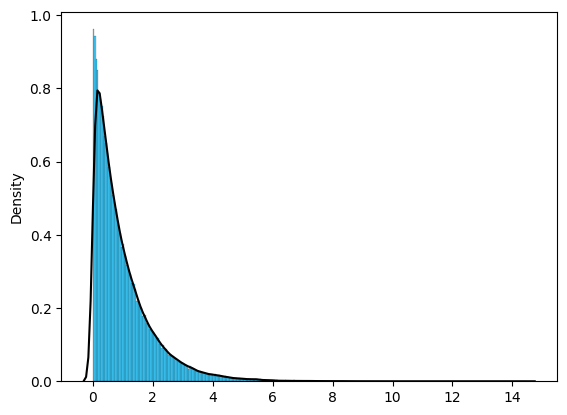

In [12]:
# Tracé de l'histogramme 

g = randomForest(100000)

sns.histplot(g, color='deepskyblue', stat='density')
sns.kdeplot(g, color='black')
plt.show()

** Tracons une fonction de la loi

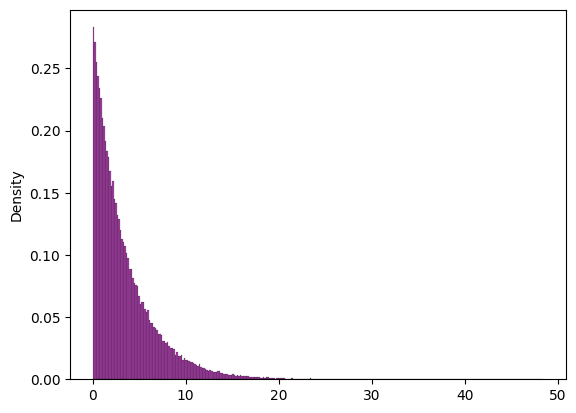

In [13]:
# c) Tracé de la loi exponentielle 

# Using exponential() method
s= np.random.seed(seed)


gfg = np.random.exponential(3.45, 100000)

sns.histplot(gfg, color='purple', stat='density')
plt.show()

** Comparaisons des deux graphes ::**

Nous constatons que plus les valeurs injectées sont grandes, plus ces deux graphes finissent par être similaire. 

# **3)Simulons des valeurs du modèle en utilisant le bruit**


**a)Ecrivons le code du modèle**

In [14]:
from scipy.stats import multivariate_normal


# Fonction du modèle
def model():
  D = 150
  r = 0.3
  s= np.random.seed(seed)

  # calcul de X0 et X1
  X0 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[0]
  X1 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[1]

  X = []
  X.append(X0)
  X.append(X1)

  #ep_k = np.random.lognormal(size=50, mean=0, sigma=.002)
  ep_k = randomForest(50)
  for i in range(2,50):    
    m = D**(1-np.exp(-r))*((X[i-1]+X[i-2])/2)**(np.exp(-r)) * ep_k[i-1]
    X.append(m)

  return X   



**b)  Affichons les valeurs en cm de la taille de l'arbre**

In [15]:
print(model()) 

[10.224326730071578, 12.287272573038988, 32.902726594515734, 37.869365743480905, 65.86943456957482, 2.4360334445442584, 17.764903460099326, 1.2254997583616896, 37.77034457529163, 15.43733821927591, 47.43906563152038, 13.956347016680192, 19.777711070876745, 0.281051055787066, 8.97102466327997, 33.93865384772628, 8.728763562083797, 13.608132742475018, 54.703326497877455, 1.6251117872636258, 2.9239866105986554, 6.694104506632585, 24.280292577039273, 0.2442081619758302, 32.21144846863344, 48.395808099584606, 4.461211340684395, 44.284315644904396, 27.786455917391926, 34.09074713278635, 145.04495282040844, 0.001231941738223406, 24.835834637833997, 29.504623658455806, 16.602013525276796, 12.149064849989731, 31.38625084181457, 90.02625963174344, 21.515194131412265, 44.15537421675231, 14.198523292687096, 21.272294847451928, 28.61385258279782, 58.77222252055256, 4.230731462220867, 54.6940455541575, 35.69758632593712, 9.158182373038507, 3.816151249682205, 4.125684381110191]


# **4) Question 4**

In [16]:
def nbannée(init) :
  x = []
  for i in range(50):
    x.append(init + i)

  return x

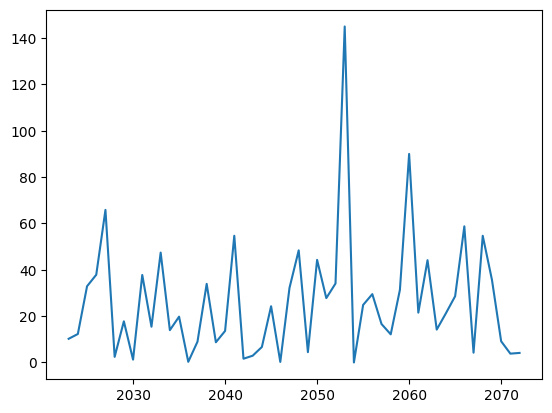

In [17]:
annee = 2023

def plotModel():
  x = nbannée(annee)
  y = model()

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotModel()


 **a) Année à laquelle l'arbre atteindra sa plus grande taille  : [texte du lien](https://)**

In [18]:
from operator import indexOf

y = model().index(max(model())) 
print (str(nbannée(annee)[y]))

2053



**b) Valeurs de cette arbre en cm**

In [19]:
print (str(max(model())) + ' cm')

145.04495282040844 cm


**c) Plus grande variation entre deux annéees :**

In [20]:
def diffrence():
  x1 = max(model())
  x2 = model()[model().index(max(model())) -1 ]

  return x1-x2

print (str(diffrence()) + ' cm')

110.95420568762209 cm


**d) Année d'observation de ces marges :**  2050 à 2053

# **5) Similation de 50 réalisations sur 50 années**


pour faire 50 réalisations sur 50 années nous devons rétirer notre seed afin de pouvoir obtenir des valeurs différentes

In [21]:
# Fonction du modèle
def nModel():
  D = 150
  r = 0.3
  # calcul de X0 et X1
  X0 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[0]
  X1 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[1]

  X = []
  X.append(X0)
  X.append(X1)

  #ep_k = np.random.lognormal(size=50, mean=0, sigma=.002)
  ep_k = randomForest(50)
  for i in range(2,50):    
    m = D**(1-np.exp(-r))*((X[i-1]+X[i-2])/2)**(np.exp(-r)) * ep_k[i-1]
    X.append(m)

  return X   

In [22]:
def realisation(n):

  matrice = np.zeros(shape=(n, n), dtype=float)

  for i in range(n):
                                     
      matrice[i,] = nModel()

  return matrice

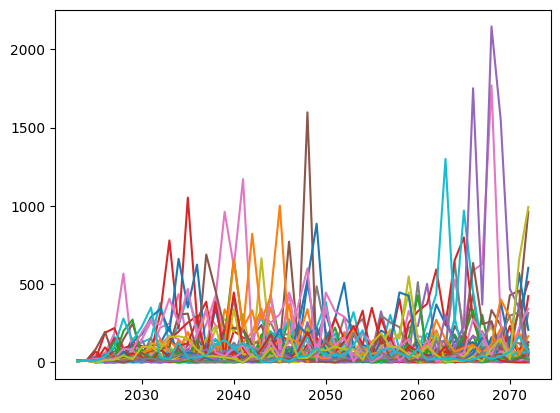

In [23]:
annee = 2023

def plotModel():
  y = realisation(50)
  
  x = nbannée(2023)
  
  for a in range(50):
      plt.plot(x, y[a,])

  plt.show()

plotModel()

> Ce modèle ne reflète pas la réalité.